# LINEAR REGRESSION ALGORITHM
**Linear Regression** *is a supervised machine learning algorithm where the predicted output is continuous and has a constant slope. It’s used to predict values within a continuous range, (e.g. sales, price) rather than trying to classify them into categories (e.g. cat, dog).*

*In this notebook I will be going over a **simple linear regression algorithm** which uses traditional slope-intercept form, where m and b are the variables our algorithm will try to “learn” to produce the most accurate predictions. x represents our input data and y represents our prediction.*

                                                   
                                                  y = mx +  b

![Simple Linear Regression Model](simple-linear-regression-model1-l.jpg)


In [83]:
using Plots
using CSV
using DataFrames

dataset = CSV.read("test.csv", DataFrame);

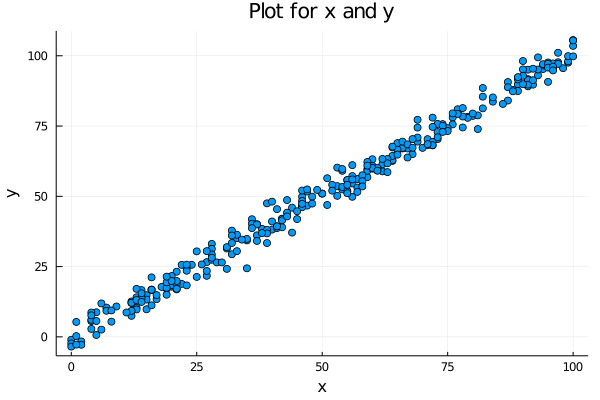

In [86]:
data = [x for x in zip(dataset.x, dataset.y)]

scatter([p for p in data],
        xaxis = "x",
        yaxis = "y",
        title = "Plot for x and y",
        legend = false)

In [90]:
# assigning my train_data and test_data

train_x = [x for x in dataset.x[1:50]]
train_y = [x for x in dataset.y[1:50]]
train_data = [x for x in zip(train_x, train_y)]
test_data = [x for x in zip(dataset.x[51:100], dataset.y[51:100])]

50-element Array{Tuple{Int64,Float64},1}:
 (94, 95.28503937)
 (88, 87.84749912)
 (52, 54.08170635)
 (31, 31.93063515)
 (59, 59.61247085)
 (0, -1.040114209)
 (39, 47.49374765)
 (64, 62.60089773)
 (69, 70.9146434)
 (57, 56.14834113)
 (13, 14.05572877)
 (72, 68.11367147)
 (76, 75.59701346)
 ⋮
 (59, 56.82457013)
 (43, 48.67252645)
 (67, 67.02150613)
 (38, 38.43076389)
 (63, 58.61466887)
 (91, 89.12377509)
 (60, 60.9105427)
 (14, 13.83959878)
 (21, 16.89085185)
 (87, 84.06676818)
 (73, 70.34969772)
 (32, 33.38474138)

In [ ]:

train_data = [x for x in zip(train_x, train_y)]
test_data = [x for x in zip(test_data.x[1:50], test_data.y[1:50])]

In [91]:
# First make the matrix X
X = ones(length(train_x), 2)
X[:, 1] = train_x

# Next solve for ŵ
ŵ = (X'*X)\(X'*train_y)

# Note: Ax = b, the x = A\b solves the system

2-element Array{Float64,1}:
 1.0071690103328008
 0.15519708088676065

In [92]:
# Define the regression line i.e., the prediction function
prediction(x) = ŵ[1]*x + ŵ[2];

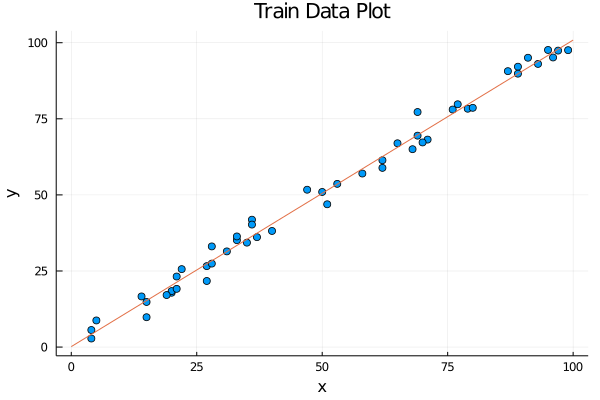

In [96]:
scatter([p for p in train_data],
        xaxis = "x",
        yaxis = "y",
        title = "Train Data Plot",
        legend = false)

plot!([(x, prediction(x)) for x = 0:100])

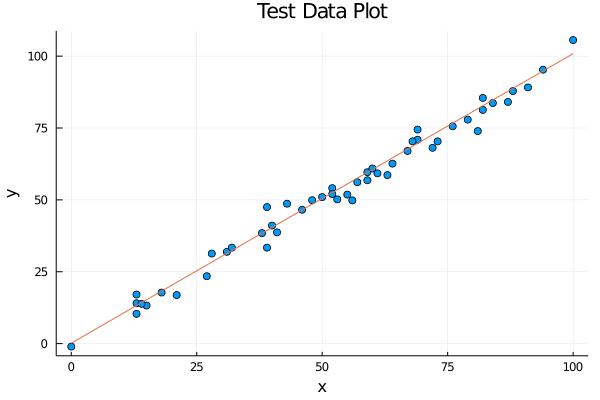

In [97]:
scatter([p for p in test_data],
        xaxis = "x",
        yaxis = "y",
        title = "Test Data Plot",
        legend = false)

plot!([(x, prediction(x)) for x = 0:100])

In [98]:
error_array = [abs(prediction(x[1])-x[2]) for x in train_data]

50-element Array{Float64,1}:
 2.0679411334875653
 1.8715325721244191
 3.296346251791622
 2.4411891575427767
 5.436582937132414
 5.457497359878772
 3.7250163915204055
 1.7816839474971573
 1.9034498175427785
 3.5557055214492355
 1.3724572962179638
 2.1960358672099787
 1.6943503128356525
 ⋮
 0.9309570002051863
 2.9546674681308147
 3.2538315588283666
 3.496949244515619
 0.44790772247320376
 1.3423326738203656
 1.4237917427820364
 1.30710267320039
 3.421812304182822
 3.629449433517223
 2.2944187841987898
 1.0946979825347825

In [99]:
maximum(error_array)

7.579967566149989

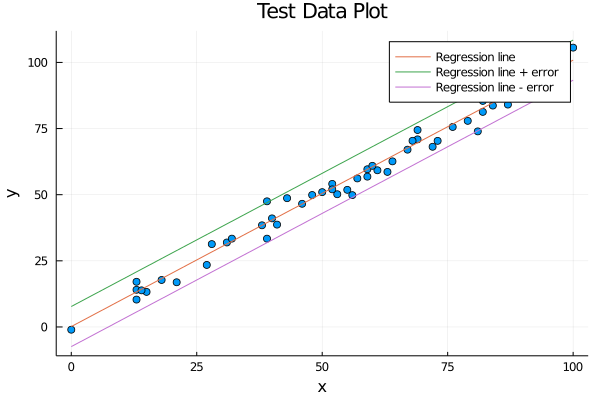

In [102]:
scatter([p for p in test_data],
        label = false,
        xaxis = "x",
        yaxis = "y",
        title = "Test Data Plot")

plot!([(x, prediction(x)) for x = 0:100], label = "Regression line")

plot!([(x, prediction(x) + maximum(error_array)) for x = 0:100], label = "Regression line + error")

plot!([(x, prediction(x) - maximum(error_array)) for x = 0:100], label = "Regression line - error")


In [103]:
prediction_interval(x) = prediction(x) - maximum(error_array), prediction(x) + maximum(error_array)

prediction_interval (generic function with 1 method)

In [104]:
test_data

50-element Array{Tuple{Int64,Float64},1}:
 (94, 95.28503937)
 (88, 87.84749912)
 (52, 54.08170635)
 (31, 31.93063515)
 (59, 59.61247085)
 (0, -1.040114209)
 (39, 47.49374765)
 (64, 62.60089773)
 (69, 70.9146434)
 (57, 56.14834113)
 (13, 14.05572877)
 (72, 68.11367147)
 (76, 75.59701346)
 ⋮
 (59, 56.82457013)
 (43, 48.67252645)
 (67, 67.02150613)
 (38, 38.43076389)
 (63, 58.61466887)
 (91, 89.12377509)
 (60, 60.9105427)
 (14, 13.83959878)
 (21, 16.89085185)
 (87, 84.06676818)
 (73, 70.34969772)
 (32, 33.38474138)

In [108]:
prediction_interval(94)

(87.24911648602006, 102.40905161832004)

**Conclusion:** *In the chunk above we use 94 to test our prediction interval and find that the values lie between (87.2491, 102.4091). The corresponding 95.2850 lies between predicition interval therefore concluding the model is accurate.*